# Implementasi VSM TF-IDF menggunakan Klasifikasi Logistic Regression

Fungsi dari logistic regression adalah sebagai berikut, menggunakan sigmoid function

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

fungsi logistic/sigmoid hanya mereturnkan angka dari range 0-1

In [1]:
# untuk plotting sigmoid
import numpy as np 
import math 

# Library untuk data manipulation & visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Library untuk model & evaluasi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Library untuk save model
import pickle

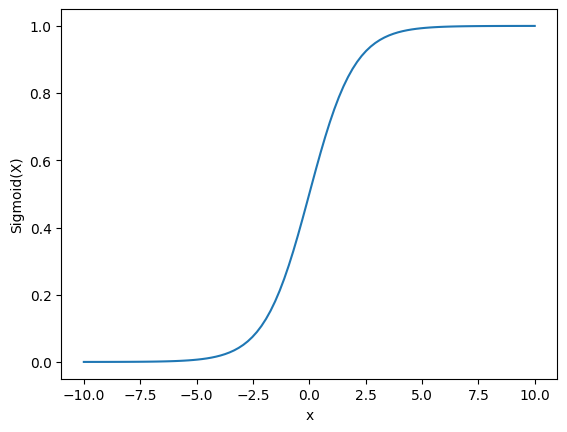

In [2]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

1. **pandas** digunakan untuk memanipulasi data
2. **matplotlib & seaborn** untuk visualisasi grafik
3. **preprocessing** untuk melakukan proses label encoding
4. **train_test_split** untuk membagi data train dan test
5. **LogisticRegression** digunakan untuk modelling logistic regression
6. **classification_report & confussion_matrix** digunakan untuk melihat hasil evaluasi atau laporan setelah proses modelling
7. **pickle** untuk menyimpan model 

## Load dataset

In [3]:
data_train = pd.read_csv('data_train_vsm.csv')
data_test = pd.read_csv('data_test_vsm.csv')

In [4]:
data_train.head(10)

,Kategori Berita,00,000,00badan,00raker,00rapat,01,02,029,03,...,zamrud,zaner,zenix,zero,zimbabwe,zona,zonamegathrustbukanlah,zonamegathrusttersebut,zonamegathrustyang,zone
0,Research,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.045304,0.0,0.000000,0.0,0.0,0.0,0.0
2,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,Research,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.052372,0.0,0.0,0.0,0.0
5,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
7,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,Research,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9,News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [5]:
data_test.head(10)

,Kategori Berita,00,000,00badan,00raker,00rapat,01,02,029,03,...,zamrud,zaner,zenix,zero,zimbabwe,zona,zonamegathrustbukanlah,zonamegathrusttersebut,zonamegathrustyang,zone
0,News,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Research,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,News,0.0,0.037161,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,News,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Research,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,News,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Research,0.0,0.000000,0.0,0.0,0.0,0.0,0.033967,0.0,0.03779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,News,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,News,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Research,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Encoding label dataset

Kategori berita adalah variabel Y yang ingin diprediksi, dikarenakan masih dalam bentuk kategorik maka harus diubah ke dalam numerik dengan label encoding

In [6]:
label_encoder = preprocessing.LabelEncoder()

# Encode Train Kategori Berita
data_train['Kategori Berita'] = label_encoder.fit_transform(data_train['Kategori Berita'])
data_test['Kategori Berita'] = label_encoder.fit_transform(data_test['Kategori Berita'])

In [7]:
data_train.head(10)

,Kategori Berita,00,000,00badan,00raker,00rapat,01,02,029,03,...,zamrud,zaner,zenix,zero,zimbabwe,zona,zonamegathrustbukanlah,zonamegathrusttersebut,zonamegathrustyang,zone
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.045304,0.0,0.000000,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.052372,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


## Split dataset (train & test)
Memisahkan dataset antara train dan test dengan train 70% dari datase dan test 30% dari dataset

In [8]:
X_train = data_train.drop(['Kategori Berita'], axis=1)
y_train = data_train['Kategori Berita']

X_test = data_test.drop(['Kategori Berita'], axis=1)
y_test = data_test['Kategori Berita']

In [9]:
X_test

,00,000,00badan,00raker,00rapat,01,02,029,03,05,...,zamrud,zaner,zenix,zero,zimbabwe,zona,zonamegathrustbukanlah,zonamegathrusttersebut,zonamegathrustyang,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.037161,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.033967,0.0,0.03779,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

membuat model yang sebelumnya sudah displit

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Testing 

memprediksi datset dengan model yang sudah dibuat

In [11]:
# Make predictions
y_pred = model.predict(X_test)

In [12]:
a = pd.DataFrame({'Data ori':y_test, 'Data tebak':y_pred})
a

,Data ori,Data tebak
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,1
6,1,1
7,0,0
8,0,0
9,1,1


## Evaluasi Model

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.75      1.00      0.86         9

    accuracy                           0.85        20
   macro avg       0.88      0.86      0.85        20
weighted avg       0.89      0.85      0.85        20



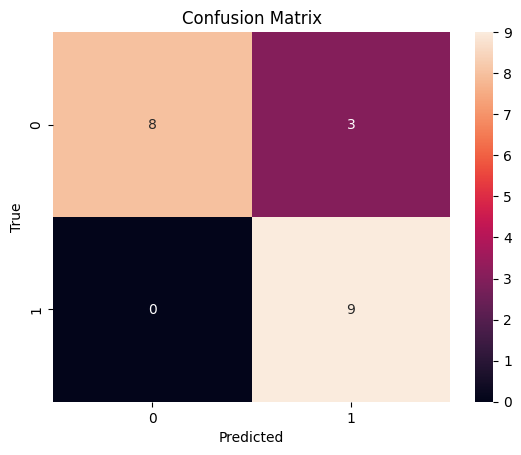

In [13]:
#Confusion matrix and classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

Dari model diatas terlihat bahwasanya akurasi sebesar 90%

## Saving model ke pickle

In [14]:
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(model, f)